MainProcess


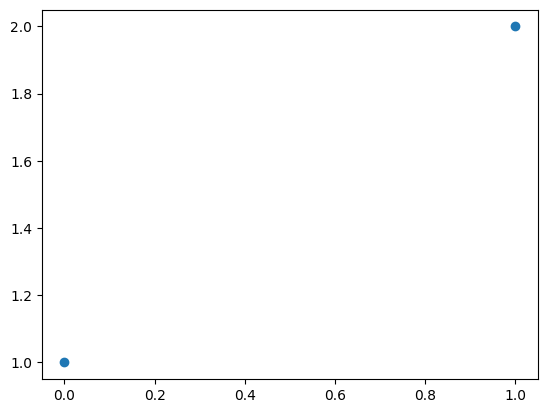

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])
fastMode = False

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 151
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 1000000
model.step1Labels.cos_lr = False
model.step1Labels.lrf = 1.0
model.step1Labels.patience = 0
model.step1Labels.dropout = 0.0
model.step1Labels.use_pretrained_weights = False
train_data = loaded_data.train_data
test_data = loaded_data.test_data
epoch_list = [25,50,75,100,125,150]
if fastMode:
    model.step1Labels.n_epochs = 15
    model.step1Labels.trust = 0
    train_data = train_data[::10]
    test_data = test_data[::10]
    epoch_list = [5,10]
#model.step1Labels.mixup = 0.0

In [5]:
for sed in range(1):
    seed = sed
    model2 = copy.deepcopy(model)
    model2.seed = seed
    model2.train(train_data, test_data)
    fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
    import shutil
    shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
    import ultralytics
    data_list = []
    for epoch in epoch_list:
        model2.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
        model2.step1Labels.concentration = 2
        model2.run_in_parallel=True
        data_list.append(model2.infer(test_data))
        fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
    fls.dill_save(fls.temp_dir + 'intermediate_data' + str(seed) + '.pickle', data_list)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.130 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=1000000, cls=0.5, conf=None,

train: Scanning /flagellar/temp/yolo_dataset/labels/train... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:01<00:00, 2743.81it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1504.0±999.1 MB/s, size: 79.4 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<00:00, 2368.23it/s]

val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 101 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/101      4.82G      2.777      3.695      1.254         12        640: 100%|██████████| 249/249 [00:22<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.57it/s]

                   all        393        369      0.622      0.588      0.579      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/101      5.69G       2.24      1.944      1.083         10        640: 100%|██████████| 249/249 [00:20<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.24it/s]


                   all        393        369      0.553      0.729      0.688      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/101      5.69G      2.117      1.747      1.057         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.743       0.77      0.793      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/101      5.69G      1.993       1.58      1.025          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369        0.8      0.791      0.813        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/101       5.7G      1.971      1.509      1.013         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.887      0.703      0.832      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/101       5.7G      1.869       1.46     0.9939         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.25it/s]

                   all        393        369       0.81      0.887      0.916      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/101       5.7G      1.809      1.348     0.9849         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.716      0.713      0.735      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/101       5.7G      1.761      1.259     0.9728          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.883      0.829       0.91      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/101       5.7G      1.731      1.237     0.9624         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.23it/s]


                   all        393        369      0.932      0.853      0.934      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/101       5.7G      1.687      1.187     0.9501         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.967      0.894      0.953      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/101       5.7G      1.674      1.177     0.9457         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.941      0.946      0.973      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/101       5.7G      1.645      1.146     0.9381          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.33it/s]

                   all        393        369      0.966      0.859      0.948      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/101       5.7G      1.586      1.105     0.9263         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.26it/s]

                   all        393        369      0.948      0.886      0.929      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/101       5.7G      1.562      1.072       0.92         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.913      0.881      0.946      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/101       5.7G      1.533      1.048     0.9148         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369      0.951      0.889      0.939      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/101       5.7G      1.531      1.031     0.9191         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.77it/s]

                   all        393        369      0.933      0.908      0.945       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/101       5.7G      1.531      1.027     0.9082         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.935      0.931      0.959      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/101       5.7G      1.486     0.9859     0.9059         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.976      0.924      0.964      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/101       5.7G      1.467     0.9645     0.8974          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.947        0.9      0.958      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/101       5.7G      1.422     0.9413     0.8926          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.971      0.919      0.968      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/101       5.7G      1.454      0.927     0.8905         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.29it/s]

                   all        393        369       0.96      0.908      0.948      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/101       5.7G      1.392     0.9226     0.8883         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.27it/s]

                   all        393        369      0.968      0.921      0.948      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/101       5.7G      1.398     0.9159     0.8887         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.978       0.94      0.973      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/101       5.7G      1.369     0.8761     0.8854         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.966      0.917      0.965       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/101       5.7G      1.354     0.8808     0.8804         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.952      0.923      0.966      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/101       5.7G      1.402     0.8943      0.884         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.29it/s]

                   all        393        369      0.966      0.937      0.975      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/101       5.7G      1.331     0.8428     0.8841          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]

                   all        393        369      0.968       0.93       0.97      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/101       5.7G      1.313     0.8505     0.8774          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.984      0.921      0.963      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/101       5.7G      1.339     0.8213     0.8766         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369       0.95      0.919      0.959      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/101       5.7G      1.286     0.8476     0.8703         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.978      0.954      0.976        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/101       5.7G      1.302     0.8297     0.8727         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369      0.978       0.94       0.96      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/101       5.7G      1.281     0.8197     0.8705          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.939      0.919      0.967      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/101       5.7G      1.262      0.795     0.8682         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.21it/s]

                   all        393        369       0.98      0.921      0.971      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/101       5.7G      1.247      0.806     0.8649          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.979      0.959      0.983      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/101       5.7G       1.24     0.7612      0.861         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.50it/s]

                   all        393        369      0.961      0.935      0.967      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/101       5.7G      1.243      0.777     0.8666         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.967      0.932      0.977      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/101       5.7G      1.212     0.7726     0.8588          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.971      0.918      0.968      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/101       5.7G      1.238     0.7931     0.8627         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.16it/s]

                   all        393        369      0.962      0.927      0.969      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/101       5.7G      1.213     0.7689     0.8551         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.17it/s]

                   all        393        369      0.944      0.924      0.966      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/101       5.7G      1.186     0.7388     0.8506          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.982      0.957      0.977      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/101       5.7G      1.182     0.7422     0.8609         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.961      0.938      0.977      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/101       5.7G      1.168     0.7284     0.8543         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.47it/s]

                   all        393        369      0.991      0.929      0.984      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/101       5.7G      1.185     0.7296     0.8565          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.935      0.936      0.957      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/101       5.7G      1.181     0.7517     0.8599         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.972       0.95       0.98      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/101       5.7G      1.152     0.7259     0.8568          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.983      0.951      0.985      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/101       5.7G      1.154     0.7057     0.8507         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]

                   all        393        369      0.961      0.962      0.977      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/101       5.7G      1.137      0.714     0.8502          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.941      0.962      0.979      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/101       5.7G       1.16     0.7371     0.8497         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369      0.961       0.94      0.972      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/101       5.7G      1.135     0.6989      0.847          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.951       0.94      0.969      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/101       5.7G      1.143      0.681     0.8471          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369      0.975      0.924      0.971      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/101       5.7G      1.127      0.685     0.8494          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.974      0.954      0.979      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/101       5.7G      1.106     0.6808      0.844         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.972      0.955      0.983      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/101       5.7G      1.094     0.6916     0.8468         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369       0.97      0.943      0.973      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/101       5.7G       1.09     0.6927     0.8397          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.986      0.939      0.978      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/101       5.7G       1.08     0.6718       0.84          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.31it/s]

                   all        393        369      0.971      0.954      0.979       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/101       5.7G      1.094      0.684     0.8435          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.976      0.954      0.978       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/101       5.7G      1.101     0.6726     0.8473          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.975      0.946      0.979      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/101       5.7G      1.051     0.6546     0.8355          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369       0.96      0.946      0.969      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/101       5.7G      1.085      0.648     0.8416         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.961      0.946      0.955       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/101       5.7G      1.055     0.6575     0.8391          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.50it/s]

                   all        393        369      0.953       0.94      0.979      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/101       5.7G       1.06     0.6633     0.8377          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.975       0.94      0.982      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/101       5.7G      1.094     0.6781     0.8446         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.50it/s]

                   all        393        369      0.965      0.951       0.98      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/101       5.7G      1.042     0.6356     0.8379          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.983      0.932      0.976      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/101       5.7G      1.031     0.6439     0.8337          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.955      0.925      0.966       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/101       5.7G       1.04     0.6418     0.8372         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.978      0.949      0.977      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/101       5.7G      1.039     0.6541     0.8391         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 10.83it/s]

                   all        393        369      0.963      0.951      0.978      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/101       5.7G      1.033     0.6216     0.8359          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369       0.97       0.95       0.98      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/101       5.7G      1.001     0.6126     0.8303         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.978      0.956       0.98      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/101       5.7G       1.02      0.621      0.833          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.983      0.938      0.977      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/101       5.7G      1.042     0.6314     0.8339          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.978      0.908      0.979      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/101       5.7G      0.992     0.6378       0.83         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.986      0.946       0.98      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/101       5.7G      0.996     0.6064     0.8268          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.47it/s]

                   all        393        369       0.98      0.939      0.975      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/101       5.7G      1.018     0.6452     0.8343         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.982      0.943      0.977       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/101       5.7G     0.9867      0.607      0.831          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.983      0.951      0.987      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/101       5.7G      1.001     0.6198     0.8336          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.994       0.95      0.987      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/101       5.7G     0.9946      0.608     0.8263          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.47it/s]

                   all        393        369      0.976      0.935      0.967      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/101       5.7G     0.9767      0.597     0.8302          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369       0.98      0.902      0.978      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/101       5.7G     0.9692     0.5845     0.8273          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.988       0.92      0.977      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/101       5.7G     0.9932     0.6116     0.8341          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369       0.98      0.942      0.979      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/101       5.7G     0.9846     0.6037     0.8314         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.989      0.943      0.982        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/101       5.7G     0.9755     0.6062     0.8279         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.976      0.902       0.97      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/101       5.7G     0.9687     0.5851     0.8283          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.982      0.927      0.978      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/101       5.7G     0.9634     0.5757     0.8317         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.959      0.948      0.979       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/101       5.7G     0.9577     0.5841     0.8225         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.957      0.938      0.978      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/101       5.7G     0.9782     0.5929     0.8281         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.967      0.947      0.975      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/101       5.7G     0.9446     0.5726     0.8285          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.986        0.9      0.965       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/101       5.7G     0.9419     0.5633     0.8261         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.946      0.946      0.975      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/101       5.7G     0.9441      0.588     0.8256         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.961      0.951      0.973      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/101       5.7G     0.9392     0.5841     0.8221          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.09it/s]

                   all        393        369      0.975      0.951       0.98       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/101       5.7G     0.9522     0.5927     0.8255         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369       0.98      0.908      0.977      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/101       5.7G     0.9414      0.574     0.8254          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.967      0.943      0.976      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/101       5.7G     0.9406     0.5745     0.8265         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.968      0.919      0.973      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/101       5.7G     0.9278     0.5513     0.8182         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.969      0.944      0.982      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/101       5.7G     0.9333     0.5628     0.8237         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369       0.98      0.925      0.969      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/101       5.7G     0.9365     0.5656     0.8242          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.988      0.905       0.97       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/101       5.7G     0.9366     0.5571     0.8234          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.986      0.957      0.978      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/101       5.7G     0.9283     0.5802     0.8223         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.975      0.966      0.987      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/101       5.7G     0.9193     0.5532     0.8162          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.975      0.954      0.977      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/101       5.7G     0.9022     0.5505     0.8197         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.962       0.94      0.978      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/101       5.7G     0.9115     0.5595     0.8194         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.986      0.926      0.964      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/101       5.7G     0.9124     0.5627     0.8201          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.958      0.935      0.959      0.575



101 epochs completed in 0.611 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 52.0MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 52.0MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.79it/s]


                   all        393        369      0.899      0.916      0.958      0.591
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!
Clearing cupy


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-1
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  587  349  471    0.373047
1  623  321  530    0.140381
2  685  495  438    0.118408
3  100  246  556    0.108215
4  633  328  518    0.107422
5  497  466  694    0.106689
6  631  306   90    0.094360

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  451  256  672    0.669922
1  421  293  835    0.534180
2  443  463  483    0.458984
3  390  466  496    0.230957
4  473  269  656    0.224731
5  457  267  647    0.208130
6  394  421  511    0.189575
7  386  395  531    0.137085

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  c

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-2
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  597  439  293    0.375732
1  234   62  441    0.332031
2  497  467  695    0.202393

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  294  834    0.787109
1  435  256  766    0.621582
2  489  873  408    0.196167
3  475  689  427    0.159790

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  441  503  680    0.522461
1  230  465  408    0.325195
2  336  351  627    0.182373
3  300  434  655    0.119995

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CON

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-3
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  599  437  292    0.814453
1  497  469  694    0.351318
2  635  304   92    0.272705
3  473  454  663    0.266602
4  230   67  441    0.190674

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  294  833    0.856445
1  386  389  882    0.531250
2  459  270  648    0.498047
3  413  251  692    0.429199
4  398  272  653    0.261230

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  411  276  510    0.517578
1  356  421  674    0.484375
2  441  504  679    0.477539
3  310  556  705    0.352295
4  398  878  634    

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-4
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  595  348  474    0.362061
1  615  299  107    0.296631
2  635  305   92    0.108582
3  473  455  662    0.091064
4  607  297   97    0.083313

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  294  832    0.852051

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  415  274  511    0.176147
1  356  419  675    0.122131
2  268  565  883    0.099121
3  310  557  704    0.071838
4  208  767  274    0.058990
5  336  350  625    0.045013
6  493  497  635    0.039490

Clearing pytorch
Clearing cupy
Processing tomogr

<ErrorbarContainer object of 3 artists>

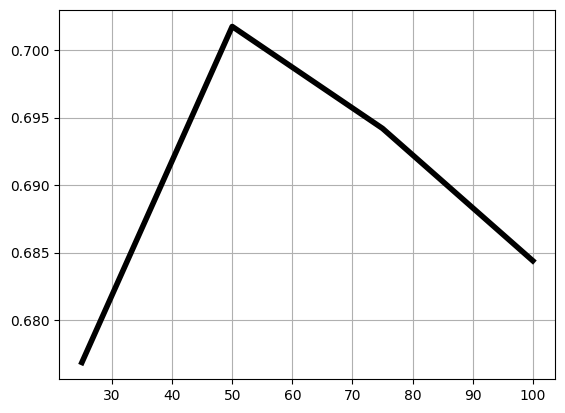

In [6]:
plt.figure()
plt.grid(True)
all_scores = []
files = glob.glob(fls.temp_dir + 'intermediate_data*.pickle')
for f in files:
    data_list = fls.dill_load(f)
    import flg_diagnostics
    import importlib
    importlib.reload(flg_diagnostics)
    scores = []
    for d in data_list:
        a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
        scores.append(fls.score_competition_metric(a,b)[2])
    plt.plot(epoch_list,scores)
    all_scores.append(scores)
all_scores=np.array(all_scores)
plt.errorbar(epoch_list, np.mean(all_scores,axis=0), yerr = np.std(all_scores,axis=0)/np.sqrt(all_scores.shape[0]), linewidth=4, color='black')

In [7]:
import scipy.stats
scipy.stats.ttest_1samp(all_scores[:,3]-all_scores[:,2],0)

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


TtestResult(statistic=nan, pvalue=nan, df=0)